In [3]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [4]:
#한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family=fontprop.get_name())

In [5]:
df = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\비어플\\1주차 과제\\train.csv',encoding='UTF-8')

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 0. 결측치 확인 및 처리

In [7]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [9]:
df[df['Temperature(째C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6,01/12/2017,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
21,01/12/2017,405,21,NaN,81,0.8,1687,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes
22,01/12/2017,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes
23,01/12/2017,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,31/10/2018,141,5,NaN,74,NaN,2000,-0.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8025,31/10/2018,996,9,NaN,56,1.8,1825,-2.9,0.89,0.0,0.0,Autumn,No Holiday,Yes
8027,31/10/2018,818,11,NaN,41,2.6,1907,-3.8,1.96,0.0,0.0,Autumn,No Holiday,Yes
8031,31/10/2018,994,15,NaN,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
df[df['Wind speed (m/s)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
16,01/12/2017,484,16,1.2,54,NaN,793,-7.0,0.24,0.0,0.0,Winter,No Holiday,Yes
23,01/12/2017,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes
43,02/12/2017,385,19,5.0,52,NaN,1666,-4.0,0.00,0.0,0.0,Winter,No Holiday,Yes
49,03/12/2017,227,1,3.9,69,NaN,485,-1.2,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,31/10/2018,141,5,NaN,74,NaN,2000,-0.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8031,31/10/2018,994,15,NaN,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes
8032,31/10/2018,1185,16,11.8,34,NaN,1979,-3.5,1.16,0.0,0.0,Autumn,No Holiday,Yes
8034,31/10/2018,2094,18,NaN,48,NaN,2000,-1.0,0.03,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
#Seasons의 값 목록 확인
df['Seasons'].unique()

array([nan, 'Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [10]:
#'월'을 이용하여 Seasons의 결측치를 대치하기 위해 'Date'에서 'month'추출
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['month'] = pd.to_datetime(df['Date'],format='%Y%m%d').dt.month
df[['Date','month']]

,Date,month
0,2017-12-01,12
1,2017-12-01,12
2,2017-12-01,12
3,2017-12-01,12
4,2017-12-01,12
...,...,...
8035,2018-10-31,10
8036,2018-10-31,10
8037,2018-10-31,10
8038,2018-10-31,10


In [11]:
#Seasons의 결측치 대치
#12,1,2월은 Winter, 3,4,5월은 Spring, 6,7,8월은 Summer, 9,10,11월은 Autumn으로 대치
df.loc[df['month'].isin([12, 1, 2]) & df['Seasons'].isna(), 'Seasons'] = 'Winter'
df.loc[df['month'].isin([3, 4, 5]) & df['Seasons'].isna(), 'Seasons'] = 'Spring'
df.loc[df['month'].isin([6, 7, 8]) & df['Seasons'].isna(), 'Seasons'] = 'Summer'
df.loc[df['month'].isin([9, 10, 11]) & df['Seasons'].isna(), 'Seasons'] = 'Autumn'
df[['Seasons','month']] #대치된 것 확인

,Seasons,month
0,Winter,12
1,Winter,12
2,Winter,12
3,Winter,12
4,Winter,12
...,...,...
8035,Autumn,10
8036,Autumn,10
8037,Autumn,10
8038,Autumn,10


In [12]:
df.isna().sum() #Seasons의 결측치가 모두 대치된 것을 확인

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
month                          0
dtype: int64

# 1. 데이터 설명
- Date : 일/월/연도
- Rented Bike Count : 대여한 자전거 수
- Hour : 시간
- Temperature : 온도
- Humidity : 습도
- Wind Speed : 바람 세기
- Visibility : 가시거리
- Dew Point Temperature : 노점(이슬이 맺히는 온도)
- Solar Radiation : 태양 복사 에너지
- Rainfall : 강수량
- Snowfall : 강설량
- Seasons : 계절
- Holiday : 휴일 여부
- Functioning day : 자전거 대여 시스템이 정상적으로 운영되는 날

#### 질문 만들기
- 시간대별 자전거 대여량의 차이
- 연도별 혹은 월별로 자전거 대여 수의 차이
- 가시거리가 짧을 때 자전거 대여량이 어떻게 변하는지
- 다른 기상 조건 (예: 온도, 습도, 강수량)과 결합하여 날씨가 자전거 대여에 미치는 영향

# 2. 데이터 살펴보기

In [33]:
#기술통계량 확인하기
df.describe()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
count,8040,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,2018-05-17 00:00:00,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493,6.125373
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,2018-02-22 00:00:00,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000,3.000000
50%,2018-05-17 00:00:00,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000,6.000000
75%,2018-08-09 00:00:00,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000,9.000000
max,2018-10-31 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,12.000000
std,NaN,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182,3.316712


In [13]:
#결측값 확인하기
df.isnull().sum() 

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
month                          0
dtype: int64

In [35]:
#중복행 확인하기
df[df.duplicated()] #중복행 없음

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month


c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


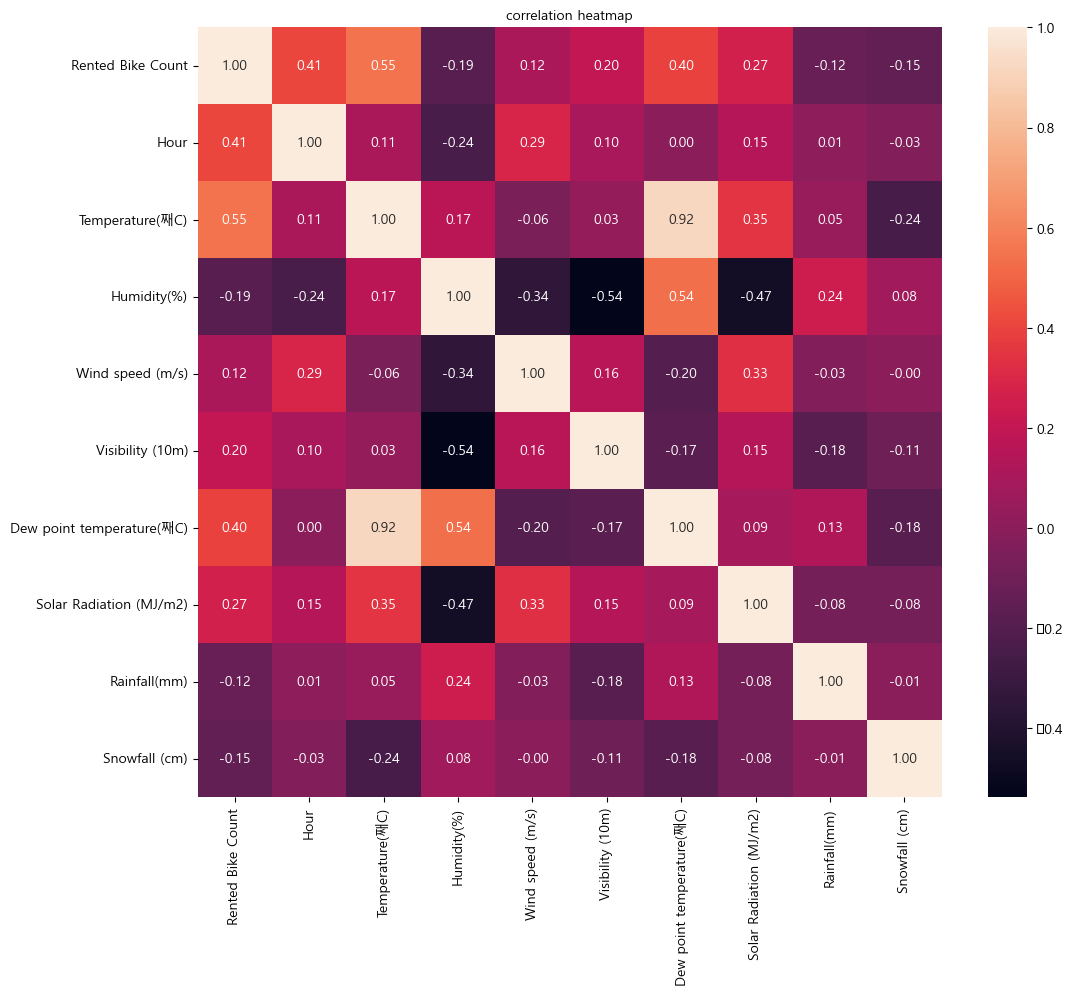

In [36]:
# 상관계수 히트맵 그리기
plt.figure(figsize=(12,10))  #사이즈 조정
sns.heatmap(df[['Rented Bike Count','Hour','Temperature(째C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(째C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True,fmt='.2f') #annot는 값  표기
plt.title('correlation heatmap',fontproperties=fontprop) #상관계수 행렬 히트맵

## 1. 시간대별 대여량

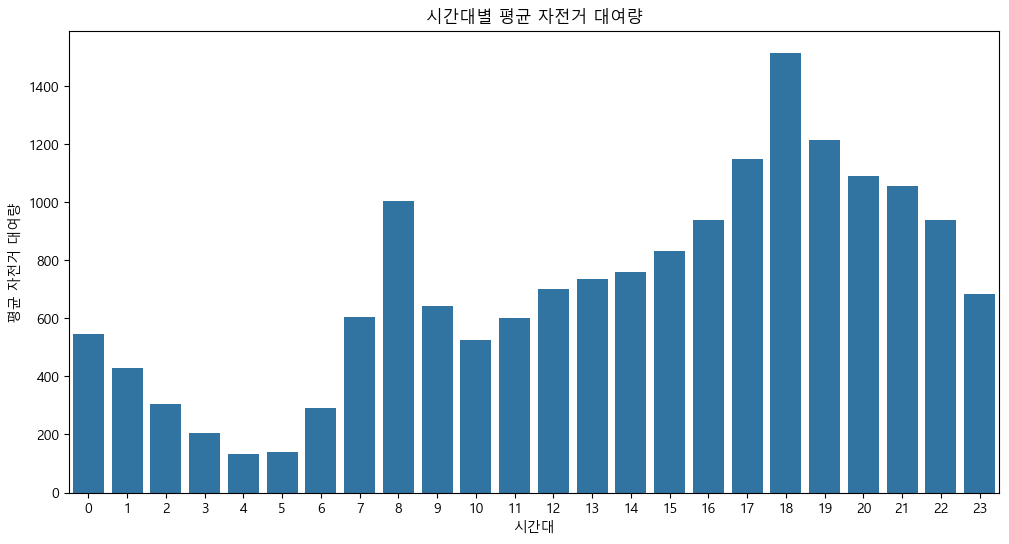

In [38]:
#1. 전체적인 시간대별 대여량 분석
plt.figure(figsize=(12, 6))
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals)
plt.title('시간대별 평균 자전거 대여량')
plt.xlabel('시간대')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 출퇴근 시간대인 8시, 18시에 대여량이 많으므로 자전거 대여 서비스는 출퇴근 시간에 할인 또는 적립 이벤트를 진행한다면 이용고객 수를 확보할 수 있다고 예상된다.

### 1-1. 계절에 따른 시간대별 자전거 대여량

In [41]:
#계절에 따라 시간대별 자전거 대여량 분석을 위해 계절의 값이 몇 개씩 있는지 파악한다.
df['Seasons'].value_counts() 

Seasons
Spring    2208
Summer    2208
Winter    2160
Autumn    1464
Name: count, dtype: int64

- 결측치를 처리하니 자료의 수의 차이가 확연히 보인다.
- 상대적으로 계절이 가을인 자료의 수가 봄, 여름, 겨울에 비해 적다.

In [42]:
plt.figure(figsize=(12, 6))
season_hourly_rentals = df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index() #계층적 인덱스를 일반적인 데이터프레임 인덱스로 변환하는 함수
season_hourly_rentals

,Seasons,Hour,Rented Bike Count
0,Autumn,0,696.229508
1,Autumn,1,534.032787
2,Autumn,2,364.262295
3,Autumn,3,247.065574
4,Autumn,4,163.049180
...,...,...,...
91,Winter,19,304.033333
92,Winter,20,243.233333
93,Winter,21,240.500000
94,Winter,22,225.133333


<Figure size 1200x600 with 0 Axes>

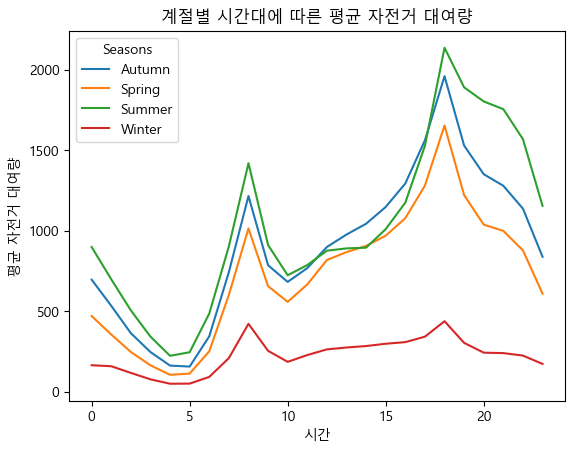

In [44]:
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=season_hourly_rentals)
plt.title('계절별 시간대에 따른 평균 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 비교적 날씨가 선선한 봄, 가을에 대여량이 많을 것으로 예상했는데 여름에 대여량이 가장 많다.
- 또한 여기서도 모든 계절에 출퇴근 시간대인 5~10시, 15~20시의 평균 자전거 대여량이 다른 시간대에 비해 월등히 높다는 것을 확인할 수 있다.
- 겨울에 대여량이 가장 적으므로 거리에 놓인 대여용 자전거의 수를 줄이거나 대여용 자전거의 수리기간으로 활용해도 좋을 것 같다.

### 1-3. 휴일 여부에 따른 시간대별 자전거 대여량

In [46]:
#휴일 여부에 따라 시간대별 자전거 대여량 분석을 위해 휴일 여부의 값이 몇 개씩 있는지 파악한다.
df['Holiday'].value_counts()

Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64

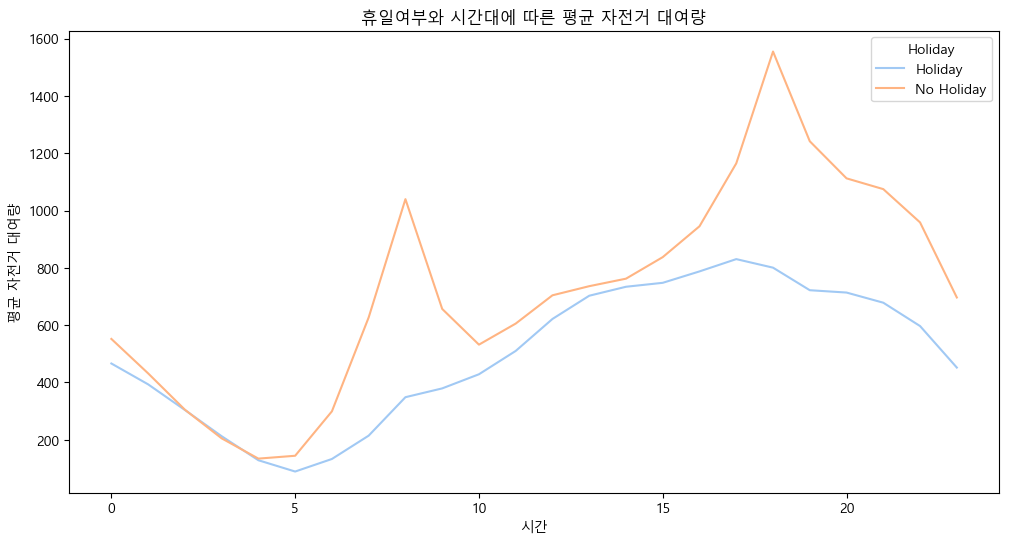

In [48]:
plt.figure(figsize=(12, 6))
holiday_hourly_rentals = df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=holiday_hourly_rentals, palette="pastel")
plt.title('휴일여부와 시간대에 따른 평균 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 휴일이 아닐 때는 출퇴근 시간인 5시-10시 사이, 15시-20시 사이에 자전거 대여량이 가장 많음을 확인할 수 있다.
- 휴일일 때는 10시 이후부터 급격히 대여량이 증가하고 15시~20시 사이에 대여량이 가장 많으며 20시 이후에 감소한다.
- 따라서 휴일에는 

## 2. 월별 자전거 대여량

In [14]:
df['month'].value_counts()
# 11월에 대한 값이 없음을 알 수 있다.

month
12    744
1     744
3     744
10    744
5     744
8     744
7     744
6     720
4     720
9     720
2     672
Name: count, dtype: int64

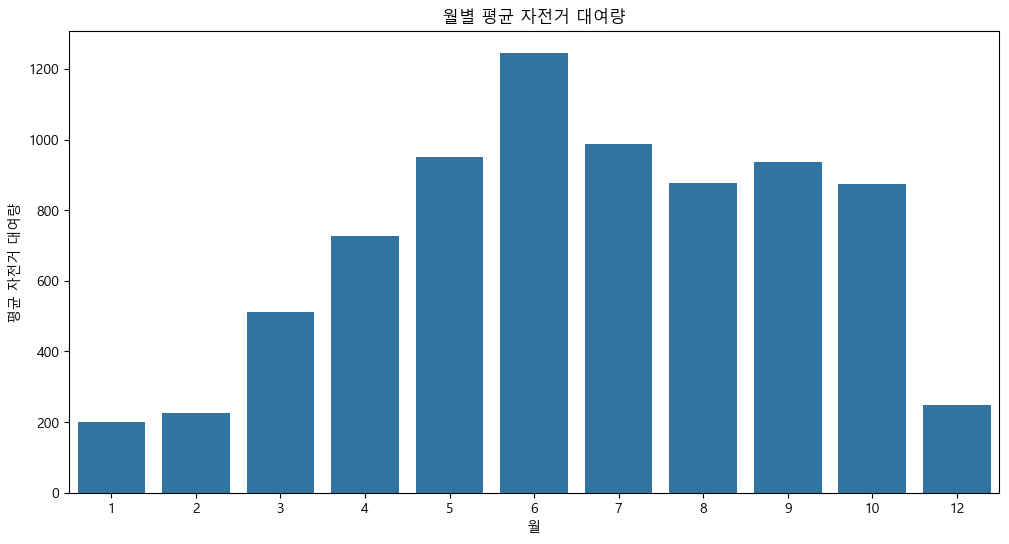

In [18]:
plt.figure(figsize=(12, 6))
monthly_rentals = df.groupby('month')['Rented Bike Count'].mean()
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values)
plt.title('월별 평균 자전거 대여량')
plt.xlabel('월')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 11월의 자료는 확인할 수 없다.
- 상대적으로 겨울(12, 1, 2월)보다 여름(6, 7, 8월)에 자전거 대여량이 많으므로 여름에 할인율 높은 멤버십 프로모션이나 이벤트를 진행하면 좋을 것 같다.

- 일요일의 자전거 대여량이 다른 요일에 비해 적은 편이지만 요일에 따른 자전거 대여량의 큰 차이는 없어보인다.

# 3. 공휴일과 평일의 평균 자전거 대여량

In [75]:
data['Holiday'].value_counts()

Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64

- 공휴일보다 평일의 자료가 훨씬 많으므로 대여량의 차이를 비교하는 것은 유의미하지 않을 것 같다.

In [78]:
#공휴일이면 대여 시스템이 운영을 하고 그렇지 않을 경우 반대인지 확인하기
functioning_holiday = data.groupby(['Functioning Day', 'Holiday']).size().reset_index(name='Count')
functioning_holiday

,Functioning Day,Holiday,Count
0,No,Holiday,24
1,No,No Holiday,199
2,Yes,Holiday,408
3,Yes,No Holiday,7409


- 공휴일이 아닌데도 대여 시스템을 운영하지 않는 건수가 199개나 있다.
- 이유가 뭐지?
- 이 데이터가 자전거 대여소의 데이터인 경우, 지정휴무일이나 우천시 자전거 대여 시스템을 운영하지 않았을 가능성이 있다.

In [24]:
# Holiday가 No Holiday이고 functioning day가 No인 경우의 Rainfall 값 확인
specific_rainfall = df[(df['Holiday'] == 'No Holiday') & (df['Functioning Day'] == 'No')]['Rainfall(mm)']
print(f"Holiday가 No Holiday이고 functioning day가 No인 경우의 Rainfall 값들:")
print(specific_rainfall)

Holiday가 No Holiday이고 functioning day가 No인 경우의 Rainfall 값들:
3144    0.0
3145    0.0
3146    0.0
3147    0.0
3148    0.0
       ... 
7418    1.5
7419    2.0
7420    2.5
7421    4.5
7422    8.5
Name: Rainfall(mm), Length: 199, dtype: float64
Holiday가 No Holiday이고 functioning day가 No인 경우의 Rainfall(mm) 값의 평균: 0.10653266331658291


In [25]:
average_rainfall = specific_rainfall.mean()
print(f"Holiday가 No Holiday이고 functioning day가 No인 경우의 Rainfall(mm) 값의 평균: {average_rainfall}")

Holiday가 No Holiday이고 functioning day가 No인 경우의 Rainfall(mm) 값의 평균: 0.10653266331658291


In [48]:
df['functioning_day_numeric'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})
df['Holiday_numeric'] = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

correlation_visibility_holiday = df['Visibility (10m)'].corr(df['Holiday_numeric'])
correlation_visibility_functioning_day = df['Visibility (10m)'].corr(df['functioning_day_numeric'])

print(f'Visibility와 Holiday 간의 상관관계: {correlation_visibility_holiday}')
print(f'Visibility와 functioning day 간의 상관관계: {correlation_visibility_functioning_day}')

Visibility와 Holiday 간의 상관관계: 0.024674472581808594
Visibility와 functioning day 간의 상관관계: -0.07642544379725243


# 4. 가시거리에 따른 자전거 대여량

In [32]:
#구간 가시거리를 구하기 위해 최솟값과 최빈값을 찾는다.
df['Visibility (10m)'].describe()

count    8040.000000
mean     1459.170896
std       603.716284
min        27.000000
25%       977.000000
50%      1741.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

C:\Users\pro_1030\AppData\Local\Temp\ipykernel_20544\2577622129.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visibility_rentals = df.groupby('Visibility_Bin')['Rented Bike Count'].mean().reset_index()


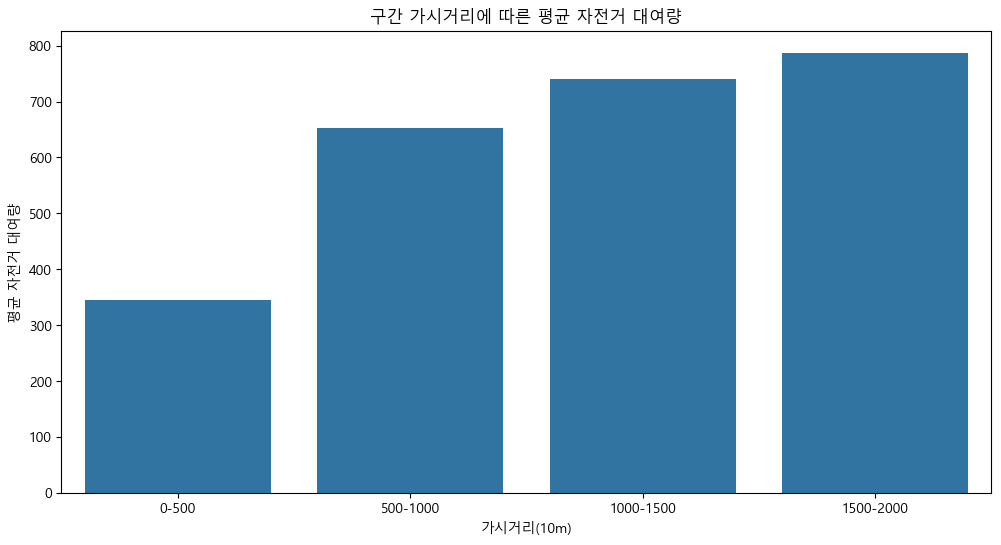

In [34]:
# 가시거리 구간 나누기
# 가시거리는 10미터 단위로 되어있기 때문에 적절한 구간을 설정합니다.
bins = [0, 500, 1000, 1500, 2000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000']
df['Visibility_Bin'] = pd.cut(df['Visibility (10m)'], bins=bins, labels=labels, include_lowest=True)

# 각 구간별 평균 자전거 대여량 계산
visibility_rentals = df.groupby('Visibility_Bin')['Rented Bike Count'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Visibility_Bin', y='Rented Bike Count', data=visibility_rentals)
plt.title('구간 가시거리에 따른 평균 자전거 대여량')
plt.xlabel('가시거리(10m)')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 예상대로 가시거리가 길수록 자전거 평균 대여량이 많다.

- 가시거리는 안개에 영향을 많이 받을 것이라고 예상한다. 또한, 안개는 습도, 온도에 영향을 많이 받을 것이다.
- 가시거리는 어떤 날씨 변수와 어떤 상관관계(음, 양)를 가질까?

In [45]:
# 가시거리와 날씨의 관계
# 날씨 변수만 따로 저장
weather_vars = ['Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)', 'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


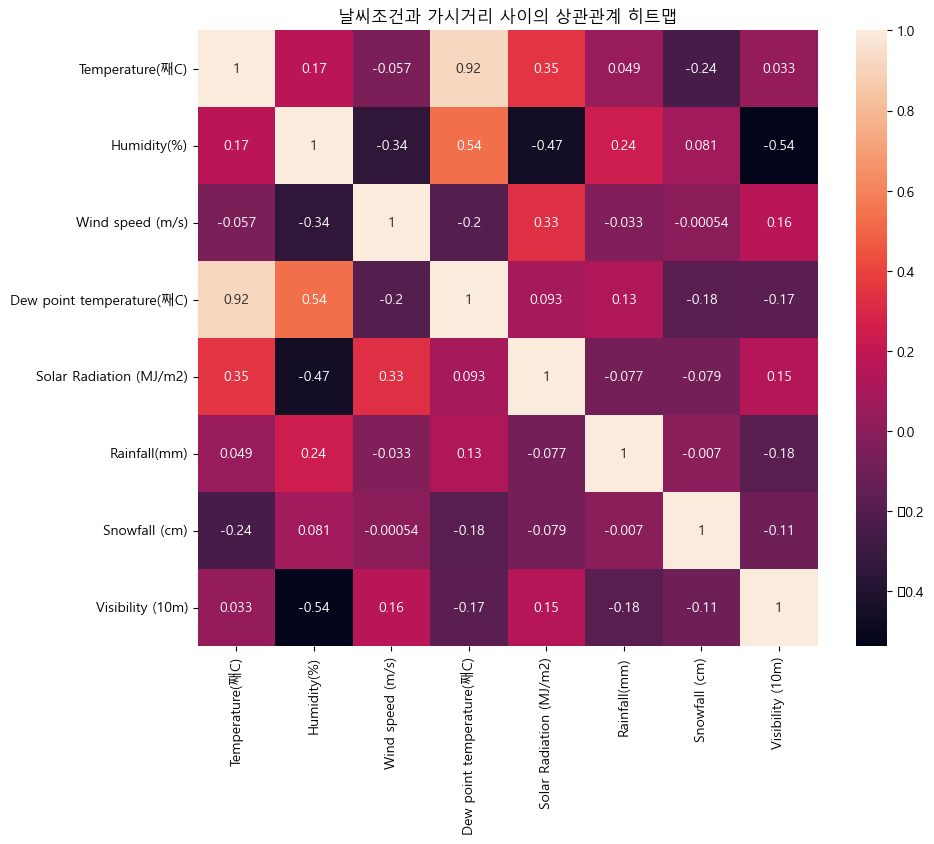

In [46]:
# 날씨 조건들과 가시거리 간의 상관관계
correlation_matrix = df[weather_vars + ['Visibility (10m)']].corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('날씨조건과 가시거리 사이의 상관관계 히트맵')
plt.show()

- 습도와 가시거리는 음의 상관관계를 가지는데 이는 습도가 높을수록 가시거리가 감소하는 경향이 있다. 이는 습도가 높아질수록 안개가 끼거나 대기 중의 수분 함량이 증가하여 가시거리가 줄어들기 때문이다.
- 일사량과도 다소 강한 음의 상관관계를 가진다고 할 수 있다.
- 상관계수의 절댓값이 0.4이상이면 강한 상관관계를 가진다고 판단하였다.


# 5. 강수량
- 강수량은 강설량과 유의미한 상관관계를 가질 것이라고 예상했는데 히트맵 확인 결과 상관계수는 -0.007로 상관관계가 거의 없음을 알 수 있다.

In [63]:
df['Rainfall(mm)'].describe() #자료 대부분의 강수량이 0임을 알 수 있다.

count    8040.000000
mean        0.152164
std         1.127026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

C:\Users\pro_1030\AppData\Local\Temp\ipykernel_20544\3019042155.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_rentals = df.groupby('Rainfall_Bin')['Rented Bike Count'].mean().reset_index()


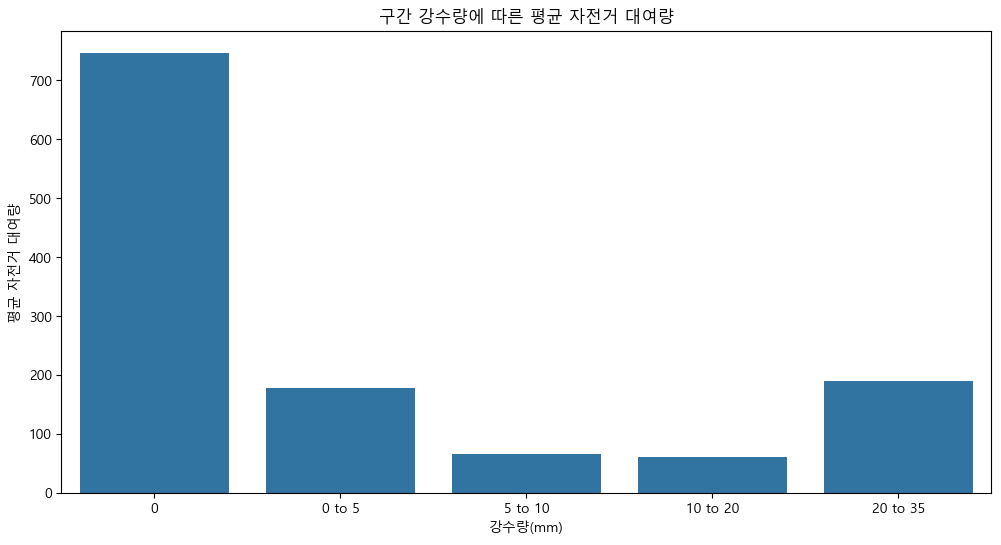

In [68]:
# 강수량 구간 나누기
df['Rainfall_Bin'] = pd.cut(df['Rainfall(mm)'], bins=[-0.1, 0, 5, 10, 20, 35], labels=['0', '0 to 5', '5 to 10', '10 to 20', '20 to 35'])

# 강수량 구간별 평균 자전거 대여량 계산
rainfall_rentals = df.groupby('Rainfall_Bin')['Rented Bike Count'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Rainfall_Bin', y='Rented Bike Count', data=rainfall_rentals)
plt.title('구간 강수량에 따른 평균 자전거 대여량')
plt.xlabel('강수량(mm)')
plt.ylabel('평균 자전거 대여량')
plt.show()

- 강수량의 max값은 35이다.
- 강수량이 0일 때 자전거 대여량이 가장 많다. 하지만 강수량이 0일 때의 자료가 월등히 많다.

# 6. 풍속별 자전거 대여량

- 풍속도 결측치가 있다. 그나마 다른 날씨 변수들 중 상관관계가 높은것은 습도(상관계수 : -0.34)와 일조량(상관계수 : 0.33)인데, 일조량은 0인 값이 많으므로 습도를 이용하여 결측치를 대치하고자 한다.
- 가장 가까운 습도 값을 가진 레코드를 찾아서 그 풍속 값으로 결측치를 대체하고자 한다.

In [82]:
df['Wind speed (m/s)'].isna().sum()

np.int64(802)

In [86]:
def impute_wind_speed(row, df):
    if pd.isnull(row['Wind speed (m/s)']):
        # 습도가 가장 비슷한 행 찾기 (결측치가 없는 경우 중에서)
        similar_row = df.loc[df['Wind speed (m/s)'].notnull(), :].iloc[(df.loc[df['Wind speed (m/s)'].notnull(), 'Humidity(%)'] - row['Humidity(%)']).abs().argsort()[:1]]
        return similar_row['Wind speed (m/s)'].values[0]
    else:
        return row['Wind speed (m/s)']

# 결측치 대치
df['Wind speed (m/s)'] = df.apply(lambda row: impute_wind_speed(row, df), axis=1)

In [87]:
df['Wind speed (m/s)'].isna().sum()

np.int64(0)

In [88]:
df['Wind speed (m/s)'].value_counts()

Wind speed (m/s)
0.9    368
1.0    364
1.1    348
1.2    342
1.6    339
      ... 
6.1      1
7.3      1
5.4      1
6.9      1
5.7      1
Name: count, Length: 65, dtype: int64

In [89]:
df['Wind speed (m/s)'].describe() #결측치를 대치했는데 describe가 바뀌지 않았다.

count    8040.000000
mean        1.763209
std         1.049527
min         0.000000
25%         1.000000
50%         1.600000
75%         2.400000
max         7.400000
Name: Wind speed (m/s), dtype: float64

In [91]:
df

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Visibility_Bin,functioning_day_numeric,Holiday_numeric,Rainfall_Bin,Wind_Speed_Bin
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,1-3 m/s
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,0-1 m/s
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,0-1 m/s
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,0-1 m/s
4,2017-12-01,78,4,-6.0,36,1.4,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,1-3 m/s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,2018-10-31,1507,19,8.4,53,1.6,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,1-3 m/s
8036,2018-10-31,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,0-1 m/s
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,1-3 m/s
8038,2018-10-31,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,1-3 m/s


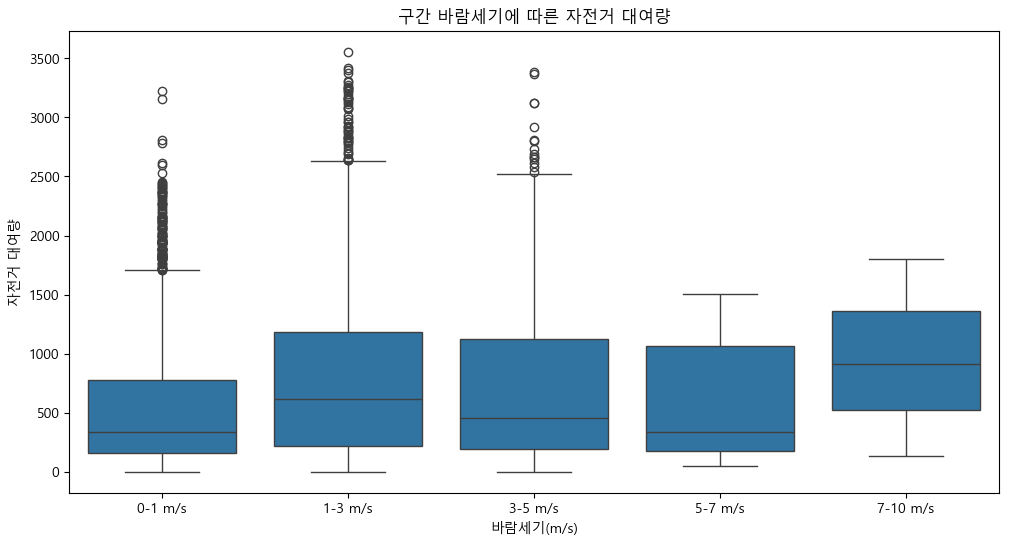

In [90]:
# 바람 세기 구간 나누기
bins = [0, 1, 3, 5, 7, 10]
labels = ['0-1 m/s', '1-3 m/s', '3-5 m/s', '5-7 m/s', '7-10 m/s']
df['Wind_Speed_Bin'] = pd.cut(df['Wind speed (m/s)'], bins=bins, labels=labels, include_lowest=True)

# 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='Wind_Speed_Bin', y='Rented Bike Count', data=df)
plt.title('구간 바람세기에 따른 자전거 대여량')
plt.xlabel('바람세기(m/s)')
plt.ylabel('자전거 대여량')
plt.show()

- 매우 낮은 바람세기에서 대여량이 가장 낮은 경향을 보이고 매우 높은 바람세기에서 오히려 대여량이 가장 높다.
- 실제로 풍속 0.3~1.5m/s 정도의 바람은 바람개비에 감지되지 않는 풍속이고 풍속 5.5~7.9m/s 정도의 바람은 건들바람으로 먼지가 일고 종이 조각이 날리는 정도의 바람이며 풍속 8.0~10.7m/s 정도의 바람은 강물에 잔물결이 일어나는 정도이다.

# 7. 기온별 자전거 대여량
- 기온은 결측치가 800개 존재하는데, 기온의 결측치는 일일이 해당 날짜의 기온을 찾아서 채울 수도 있으나 다른 방법으로 해결해보고자 한다.
- 상관관계 히트맵에서 이슬점 온도와 0.92로 교과서처럼 높은 상관계수를 확인할 수 있다.
- 이슬점 계산 테이블을 확인했을 때도 현재 온도와 습도를 이용하여 계산됨을 확인할 수 있다.
- 따라서 이슬점 온도에 따라 기온의 결측치를 대치하고자 한다.
- 가장 가까운 이슬점 온도 값을 가진 레코드를 찾아서 그 기온 값으로 결측치를 대체하고자 한다.

In [92]:
df['Temperature(째C)'].isna().sum()

np.int64(800)

In [97]:
# 결측치 처리 함수 정의
def impute_temperature(row, df):
    if pd.isnull(row['Temperature(째C)']):
        # 이슬점 온도가 가장 비슷한 행 찾기 (결측치가 없는 경우 중에서)
        similar_row = df.loc[df['Temperature(째C)'].notnull(), :].iloc[(df.loc[df['Temperature(째C)'].notnull(), 'Dew point temperature(째C)'] - row['Dew point temperature(째C)']).abs().argsort()[:1]]
        return similar_row['Temperature(째C)'].values[0]
    else:
        return row['Temperature(째C)']

# 결측치 대치
df['Temperature(째C)'] = df.apply(lambda row: impute_temperature(row, df), axis=1)
df

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Visibility_Bin,functioning_day_numeric,Holiday_numeric,Rainfall_Bin,Wind_Speed_Bin
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,1-3 m/s
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,0-1 m/s
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,0-1 m/s
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,0-1 m/s
4,2017-12-01,78,4,-6.0,36,1.4,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1500-2000,1,0,0,1-3 m/s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,2018-10-31,1507,19,8.4,53,1.6,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,1-3 m/s
8036,2018-10-31,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,0-1 m/s
8037,2018-10-31,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,1-3 m/s
8038,2018-10-31,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,10,1500-2000,1,0,0,1-3 m/s


In [98]:
df['Temperature(째C)'].isna().sum()

np.int64(0)

In [103]:
df['Temperature(째C)'].describe()

count    8040.000000
mean       13.425398
std        12.341885
min       -17.800000
25%         3.300000
50%        15.450000
75%        23.300000
max        39.400000
Name: Temperature(째C), dtype: float64

- 결측치 대치 전과 비교 결과, 아주 극소한 차이가 생겼다.
- mean 13.42 -> 13.49
- std 12.27 -> 12.34
- 25% 3.5 -> 3.3
- 50% 15.6 -> 15.45

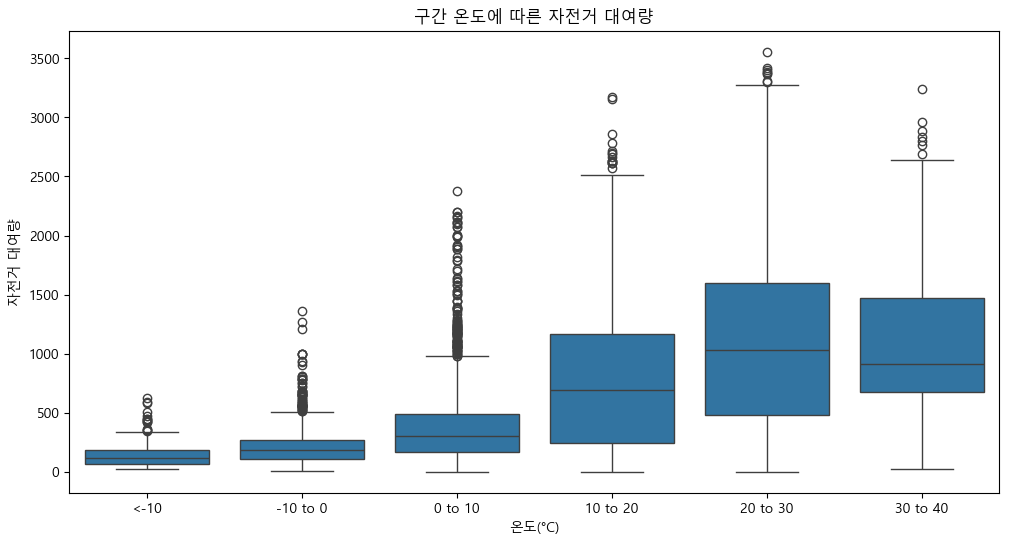

In [104]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['Temperature(째C)'], bins=[-20, -10, 0, 10, 20, 30, 40], labels=['<-10', '-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40']), y='Rented Bike Count', data=df)
plt.title('구간 온도에 따른 자전거 대여량')
plt.xlabel('온도(°C)')
plt.ylabel('자전거 대여량')
plt.show()

- 기온이 영하인 경우에는 자전거 대여량이 적고 오히려 30도 이상인 경우도 20도~30도 사이인 경우보다는 적다.
- 따라서 자전거 대여량이 가장 높은 구간은 20도에서 30도 사이로 사람들이 자전거 타기 적절한 온도라고 생각하지만 변동범위가 가장 넓은 것을 알 수 있다.

# 8. 일조량에 따른 자전거 대여량

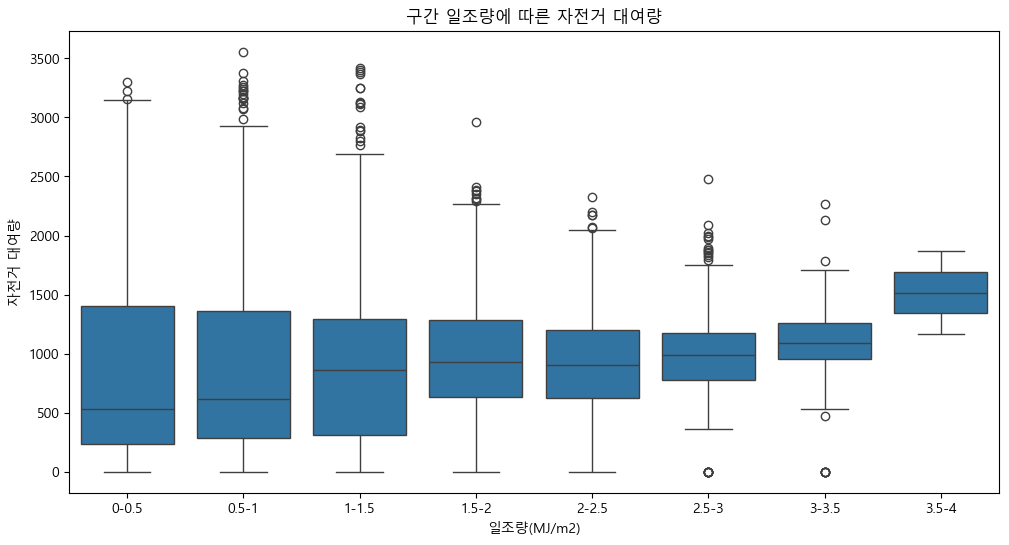

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['Solar Radiation (MJ/m2)'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3','3-3.5','3.5-4']), y='Rented Bike Count', data=df)
plt.title('구간 일조량에 따른 자전거 대여량')
plt.xlabel('일조량(MJ/m2)')
plt.ylabel('자전거 대여량')
plt.show()

- 일조량의 max값이 3.52여서 구간을 이렇게 설정했다.
- 일조량이 3.5-4MJ/m2로 가장 높은 구간에서 오히려 자전거 대여량이 많았다.(일조량이 높다는 것은 기온이 높다는 것은 아닐지 둘의 상관관계를 더 알아보자.)

c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


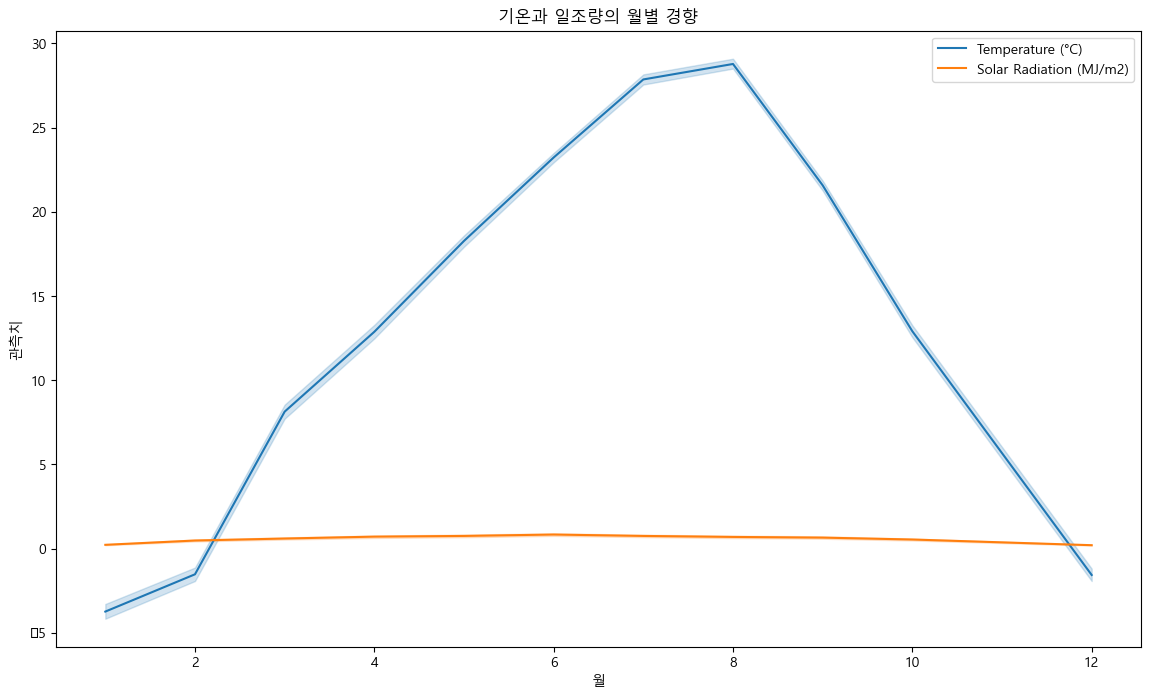

In [105]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='Temperature(째C)', data=df, label='Temperature (°C)')
sns.lineplot(x='month', y='Solar Radiation (MJ/m2)', data=df, label='Solar Radiation (MJ/m2)')
plt.title('기온과 일조량의 월별 경향')
plt.xlabel('월')
plt.ylabel('관측치')
plt.legend()
plt.show()

- 온도와 태양 복사 에너지 사이에는 상관관계가 없다고 할 수 있다.

# 9. 강설량별 대여량

In [58]:
df['Snowfall (cm)'].describe()

count    8040.000000
mean        0.066493
std         0.378182
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.100000
Name: Snowfall (cm), dtype: float64

In [61]:
monthly_snowfall = df.groupby('month')['Snowfall (cm)'].mean().reset_index()
monthly_snowfall

,month,Snowfall (cm)
0,1,0.255376
1,2,0.102083
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.000000


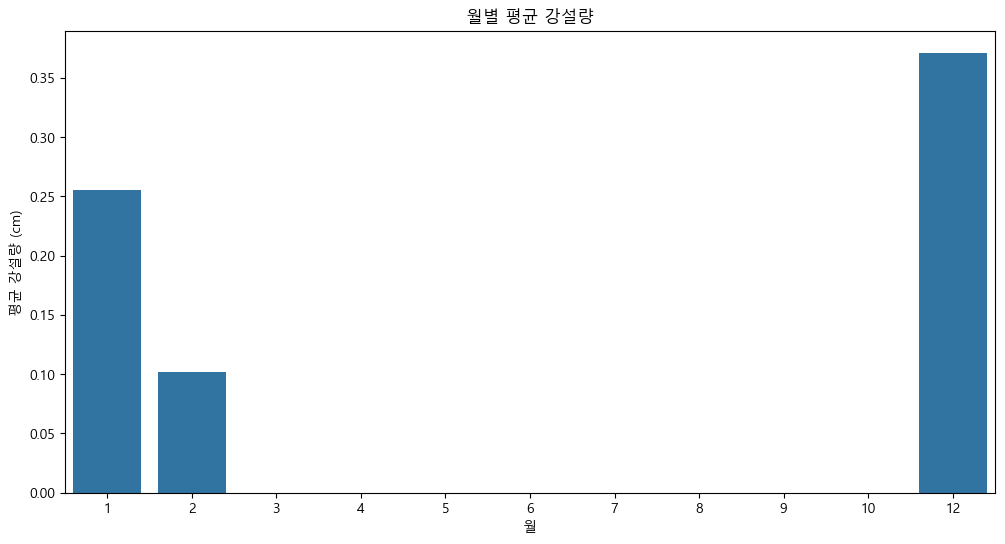

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Snowfall (cm)', data=monthly_snowfall)
plt.title('월별 평균 강설량')
plt.xlabel('월')
plt.ylabel('평균 강설량 (cm)')
plt.show()

- 월별로 평균 강설량을 시각적으로 비교할 수 있다. 일반적으로 겨울철(12월, 1월, 2월)에 강설량이 높고, 여름철(6월, 7월, 8월)에는 강설량이 낮음을 확인할 수 있다.

- 월별 평균 강설량은 월별 자전거 대여량과 반비례한 관계를 가지고 있다고 할 수 있다.